<a href="https://colab.research.google.com/github/MarkovMarkowitz/MarkovMarkowitz/blob/main/MarkowitzEfficientFrontier_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



<h1>Portfolio Construction with Minimum Volatility in Practice for BIST ("Borsa ISTanbul", Turkey) Stocks Using Modern Portfolio Theory </h1>
<h2>Alper Ulku </h2>



Modern Portfolio Theory (MPT) is a Nobel Prize-winning economic theory.
It explains how risk-averse investors can construct portfolios to optimize or maximize expected return based on a given level of market risk. <a href = "https://en.wikipedia.org/wiki/Harry_Markowitz">Harry Markowitz</a> pioneered this theory in his paper <a href = "https://onlinelibrary.wiley.com/doi/full/10.1111/j.1540-6261.1952.tb01525.x">Portfolio Selection</a> , which was published in the Journal of Finance in 1952. He was later awarded a Nobel Prize for his work on modern portfolio theory. Modern Portfolio Theory suggests diversification of all your securities and asset classes and not putting all your eggs in one basket. It emphasises the importance of portfolios, diversification, risk and the connections among different kinds of securities.


## Table of contents
1. [Volatility](#volat)
2. [Variance and Standard Deviation](#type_vol)
3. [Managing Portfolio Variance and Portfolio Variance Formula](#manpor)
4. [Asset Selection](#asset_sel)
5. [Select Backtesting Testing Dates](#select_dates)
6. [Download the adjusted close prices of stocks](#downloads)
7. [Plotting daily prices of all the stocks](#plot_daily)
8. [Finding Daily returns](#daily_rets)
9. [Standard deviations volatility and covariance matrix](#stddevs)
10. [Correlation and heatmaps of correlation and effects on volatility](#heatmaps)
11. [Markovitz Model Explanation](#markovitz)
12. [Model portfolio with minimum risk amd its performance evaluation](#model)

## Volatility <a name="volat"></a>

Volatility is a statistical measure of the dispersion of returns for a given security or market index. In most cases, the higher the volatility, the riskier the security. Volatility is often measured as either the standard deviation or variance between returns from that same security or market index.

## Variance and Standard Deviation <a name="type_vol"></a>

Investors have to keep volatility in mind as well when choosing an investment. For example, a pension fund may need to be extra careful with its money and will want to ensure they aren’t getting into any extremely volatile investments. There are also hedge funds, which short stocks and even trade volatility with options. As you can see, whether you’re risk-seeking or risk-averse, the volatility (risk) of an investment is something you should care about.

A simple measure of volatility is the variance. Variance is used to see how far away each data point in a set is away from the mean. Variance is calculated with the following steps:

Take the difference between each data point and the mean Square each difference so that they're all positive values Sum up the squared results Divide this by the count of data points minus one $\sigma^2 = \frac{\sum(x_i - \overline{x}^2)}{n-1}$

where

$\sigma^2 = \textrm{Sample Variance}$

$x_i = \textrm{value of one observation}$

$\overline{x} = \textrm{mean of all observations}$

$n = \textrm{number of observations}$

The larger the variance, the further spread out it is from the mean. Variance treats all deviations from the mean the same way, regardless of whether they are less than or greater than the mean. A variance of zero would indicate that each data point is the same.

Standard deviation is easy to calculate once you have the variance. All you have to do is take the square root of the variance:

$\sigma = \sqrt{\sigma^2}$

where

$\sigma = \textrm{standard deviation}$

Standard deviation is another commonly used statistical measure to quantify market volatility. You would expect newer growth stocks to have higher standard deviations and more established blue-chip stocks to have lower standard deviations of returns. We will illustrate this by comparing daily returns from the last five years of the S&P 500 and NASDAQ, as well as Bitcoin prices. While Bitcoin isn't necessarily a growth stock, it's still very new compared to the S&P 500 and NASDAQ, so you would expect to see bigger swings in the price when compared to those two stock indices.

This is illustrated below by taking the standard deviations of returns over the last five years. These results are as expected: Both the S&P 500 and NASDAQ have very similar daily standard deviations. Bitcoin, on the other hand, has almost five times the standard deviation of the two stock indices.

## Managing Portfolio Variance and Portfolio Variance Formula <a name="manpor"></a>

In order to try to minimize portfolio variance, a good starting point is the formula itself to calculate variance with a two-asset portfolio.

$\textrm{Portfolio Variance} = w_x^2 \sigma_x^2 + w_y^2 \sigma_y^2 + 2w_x w_y Cov_{x,y}$

where

* $w_x$ = portfolio weight of asset x
* $w_y$ = portfolio weight of asset y
* $\sigma_x$ = standard deviation of asset x
* $\sigma_y$ = standard deviation of asset y
* $Cov_{x,y}$ = Covariance of the two assets

Also, building off the previous lesson this means that
$\textrm{Portfolio Standard Deviation} = \sqrt{\textrm{Portfolio Variance}}$



With this information in mind, there are 3 things we can do to minimize variance.

1. We can pick assets with lower standard deviations of returns. This may seem obvious, but if we really want to reduce the variance of our portfolio, the simplest thing to do is just pick assets that have relatively low volatilities.
2. Invest a higher percentage of your portfolio into your less risky asset(s). For our previous example with JPM and Bitcoin, we could further reduce our portfolio variance by investing a bigger portion of our funds into JPM since it had a lower standard deviation than Bitcoin.

Sometimes, it's the case that an investor may still want to invest in a riskier asset like Bitcoin. This brings us to the third thing we can do to reduce variance.

3. Check for assets with a low covariance. If you look at the right side of our portfolio variance function, you'll notice we have the covariance of two assets as a function parameter. If we can reduce that, we can reduce the overall variance of our portfolio.

This is an important point and should be expanded upon further.


## Covariance-Correlation Relationship
If you recall from a previous lesson, the formula for correlation is:

$\rho_{x,y} = \frac{Cov_{x,y}}{\sigma_x*\sigma_y}$

We can rearrange this to get the covariance formula:

$Cov_{x,y} = \rho_{x,y}\sigma_x\sigma_y$

Then, we can plug this back into our portfolio variance formula:

$\textrm{Portfolio Variance} = w_x^2 \sigma_x^2 + w_y^2 \sigma_y^2 + 2w_x w_y \rho_{x,y}\sigma_x\sigma_y$


These formulas are basically to show that we need to minimize correlations in order to minimize portfolio variance. Owning uncorrelated assets illustrates the efficient benefits of diversification. Let's write some reusable functions to sum up the work we did above and really display how this works with a few examples.


As seen in the formula, in order to minimize portfolio variance we need to minimize the covariance term. And this can be done by minimization coefficents of this covariance term


  Preparing metadata (setup.py) ... done
  Created wheel for nsepy: filename=nsepy-0.8-py3-none-any.whl size=36057 sha256=d7085b43a40ba0c399e59ea429c7d710a6505884a3f1c1c11e2459ef293a7264
  Stored in directory: /root/.cache/pip/wheels/4c/87/cb/acaf83f625e5fc73e1fe6e2a8e97680c74cd72391850ef5a86
Successfully built nsepy
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.1/91.1 kB 1.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.8/52.8 kB 4.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 26.7 MB/s eta 0:00:00
  Created wheel for pyfolio: filename=pyfolio-0.9.2-py3-none-any.whl size=88659 sha256=c1266d19f6039a010f388df5bb96447787161e61a7d35fd8a2e8c6a876b365dc
  Stored in directory: /root/.cache/pip/wheels/71/38/bc/e53700cfd8b0ad6b539d2fbaaf060ed8a299e7622a5b86ef42
  Created wheel for empyrical: filename=empyrical-0.5.5-py3-none-any.whl size=39761 sha256=ca23580ce7

<Figure size 640x480 with 0 Axes>

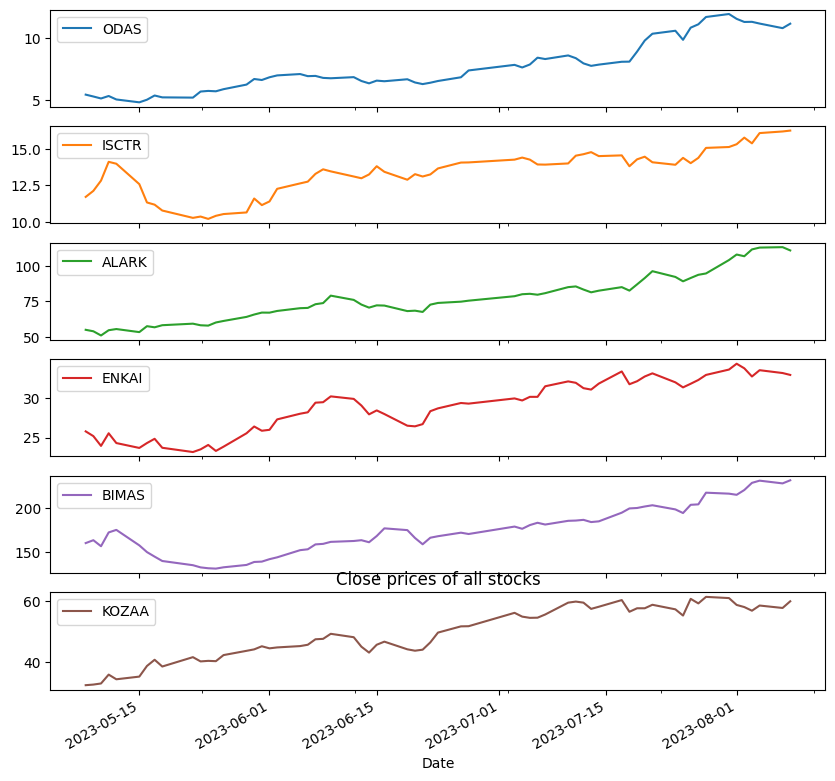

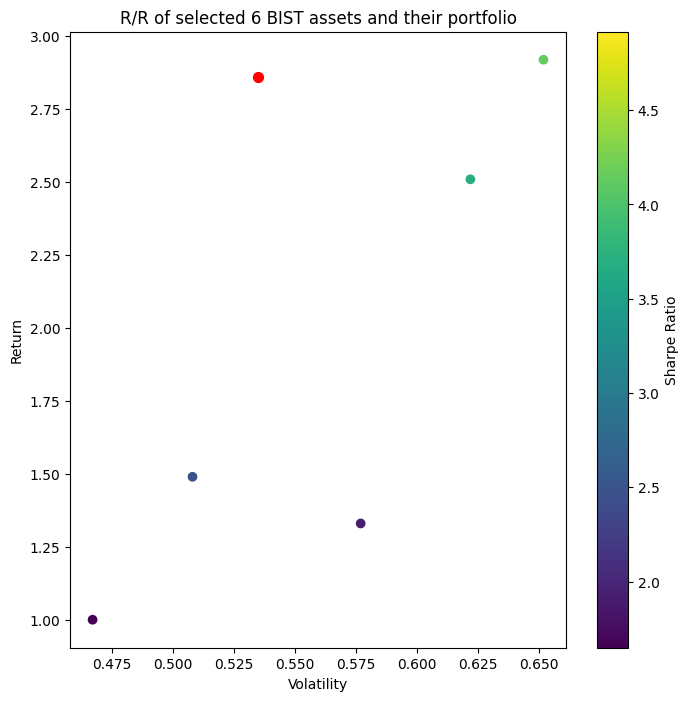

Max Sharpe Ratio = 4.915887850467289
Max Sharpe Ratio Return = 2.86
Max Sharpe Ratio Volatility = 0.535


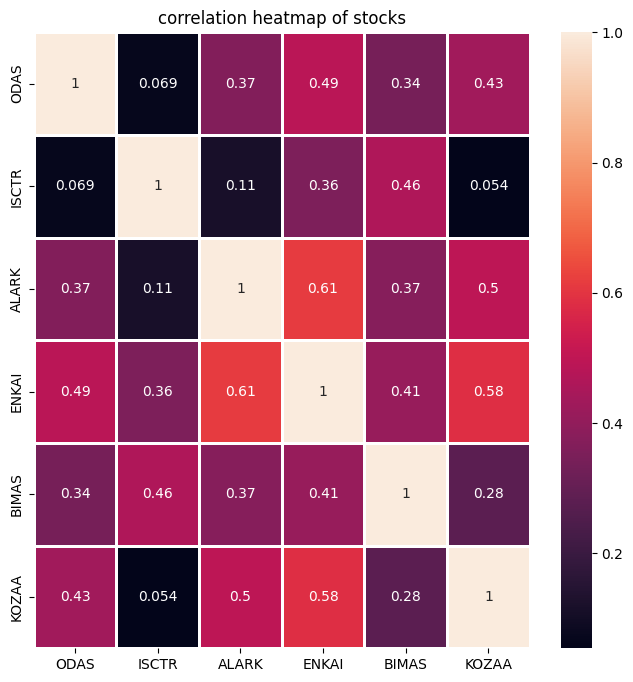

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable h

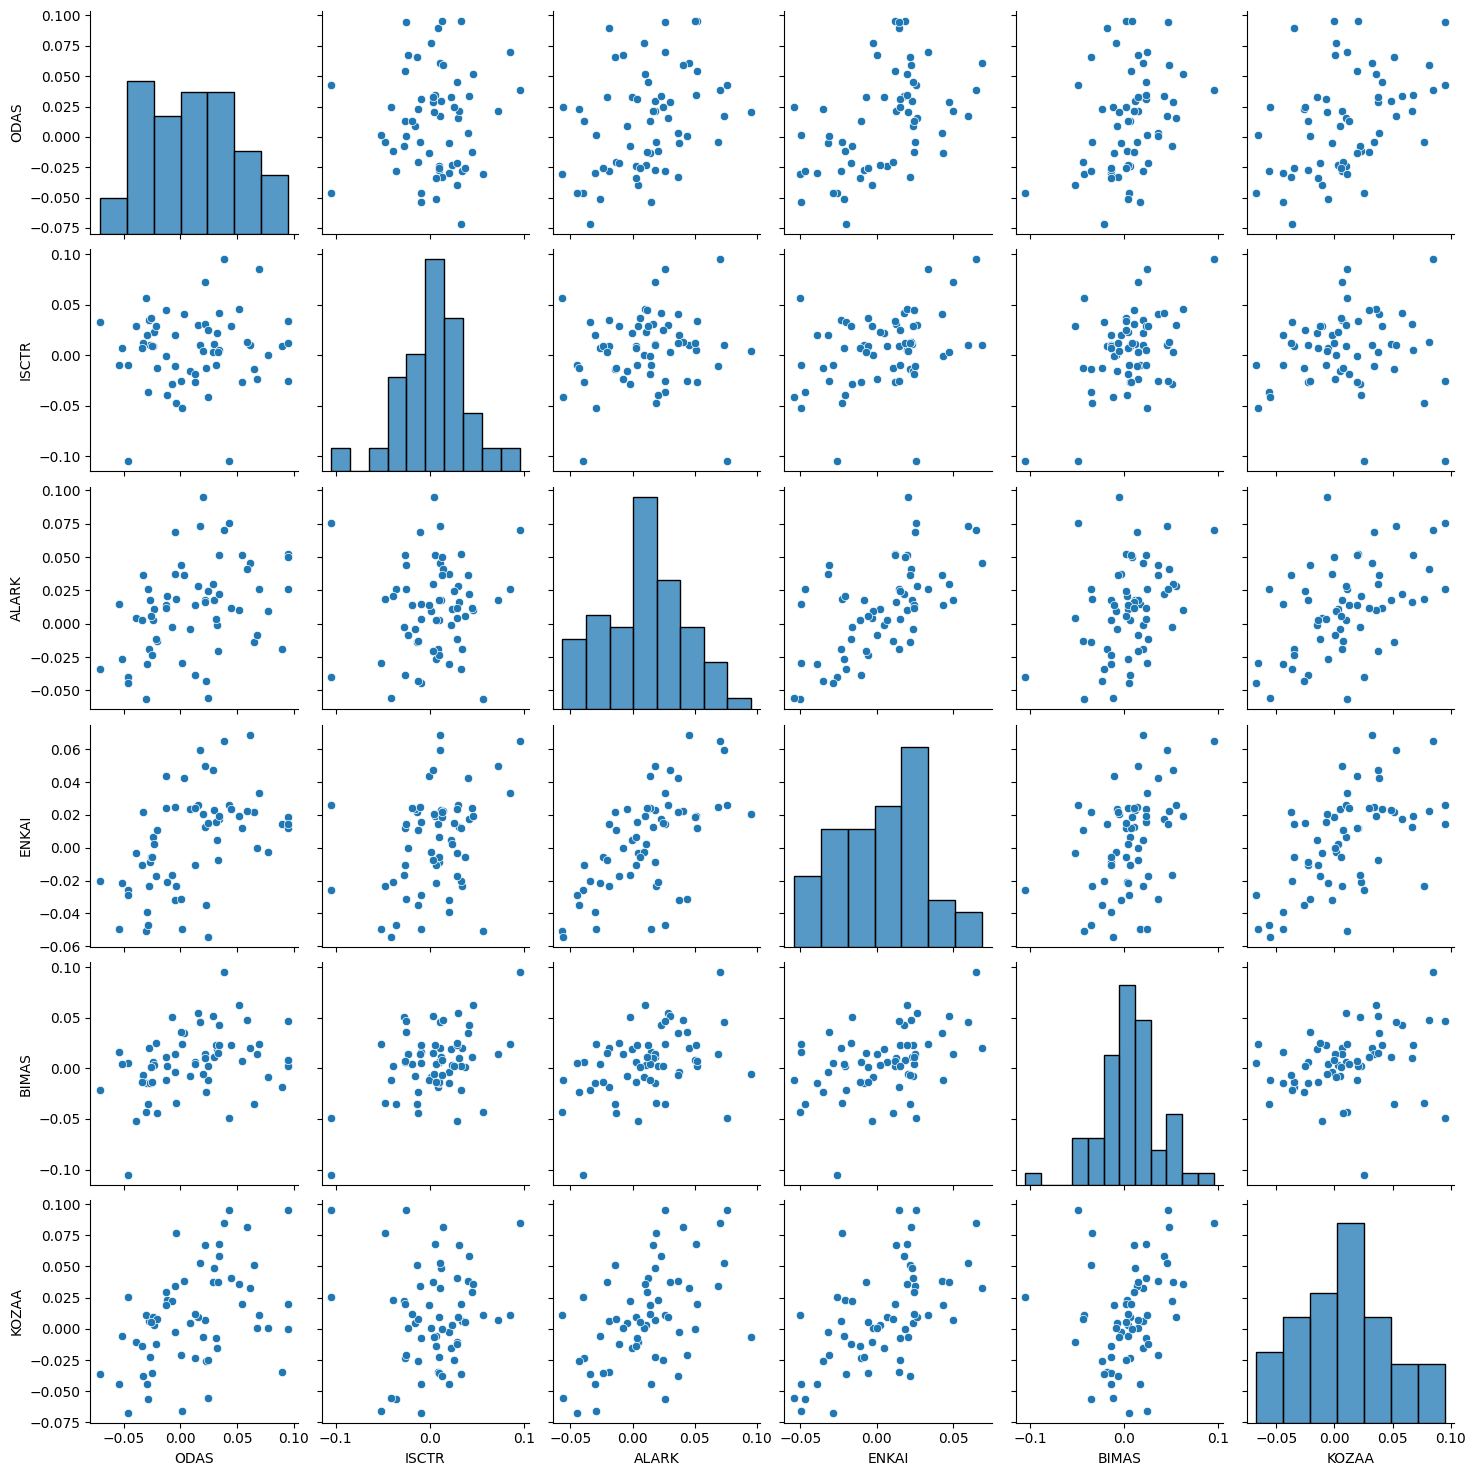

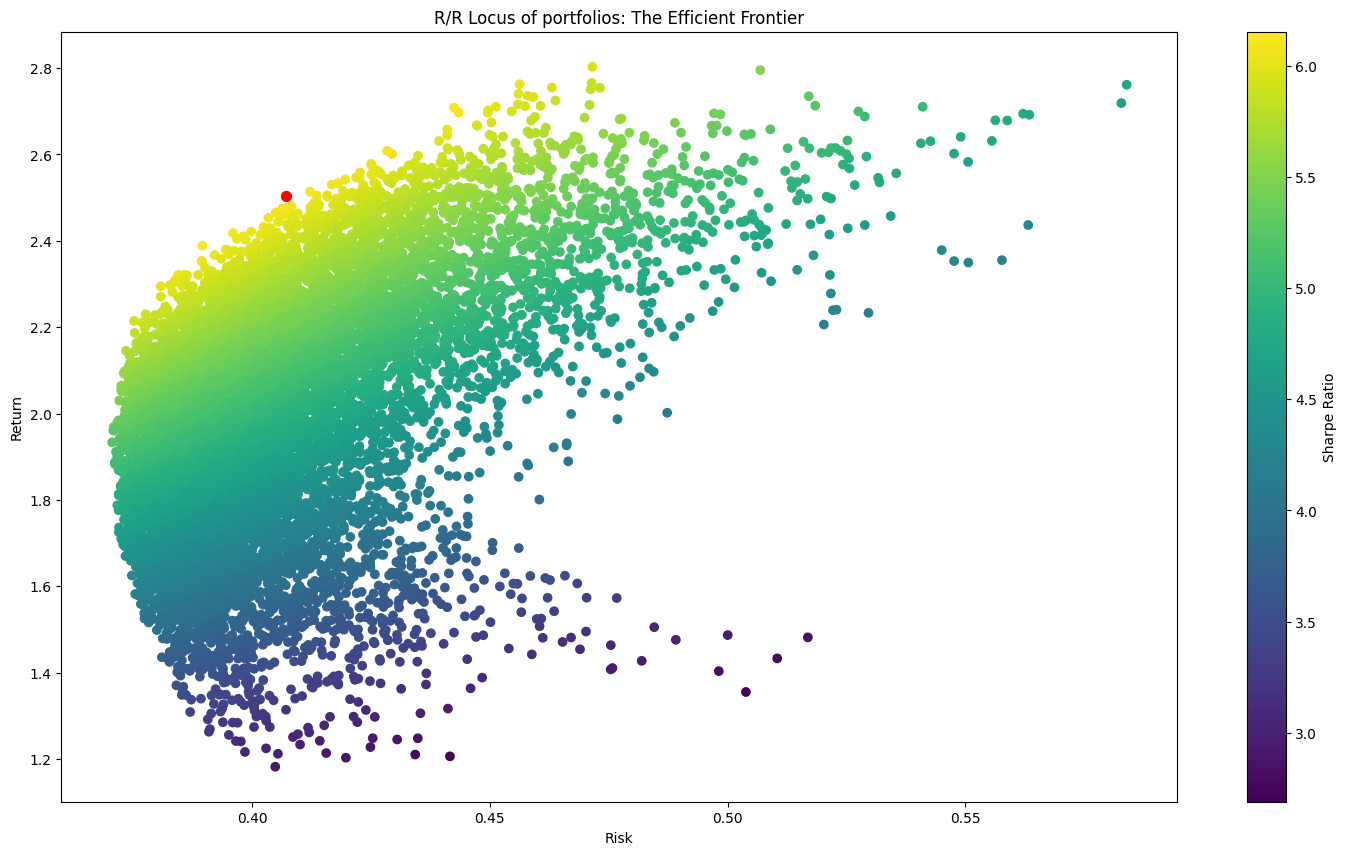

Max Sharpe Ratio = 6.154263182516964
Max Sharpe Ratio Return = 2.5048583010537544
Max Sharpe Ratio Volatility = 0.4070118918816404
[0.37006983 0.37007006 0.37006973 0.37006962 0.37006986 0.37007003
 0.37006989 0.37006992 0.37007022 0.37006963 0.37006973 0.37007072
 0.37007021 0.37007032 0.3700702  0.37007014 0.37006966 0.37006981
 0.37006977 0.3700699 ]
% weights of minimum volatility PF
------------------------------------------------------------
% weights of minimum volatility PF
{'return': 1.9075755465256032, 'risk': 0.37006998345376596, 'sharpe': 4.519619589019069}


/usr/local/lib/python3.10/dist-packages/pyfolio/pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pyfolio/timeseries.py:724: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  stats = pd.Series()
/usr/local/lib/python3.10/dist-packages/pyfolio/plotting.py:648: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for stat, value in perf_stats[column].iteritems():


Start date,2023-05-08
End date,2023-08-08
Total months,3
,Backtest
Annual return,611.5%
Cumulative returns,63.3%
Annual volatility,38.4%
Sharpe ratio,5.40
Calmar ratio,61.20
Stability,0.94
Max drawdown,-10.0%


/usr/local/lib/python3.10/dist-packages/pyfolio/plotting.py:805: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  oos_cum_returns = pd.Series([])


[0.108 0.266 0.203 0.133 0.182 0.108]


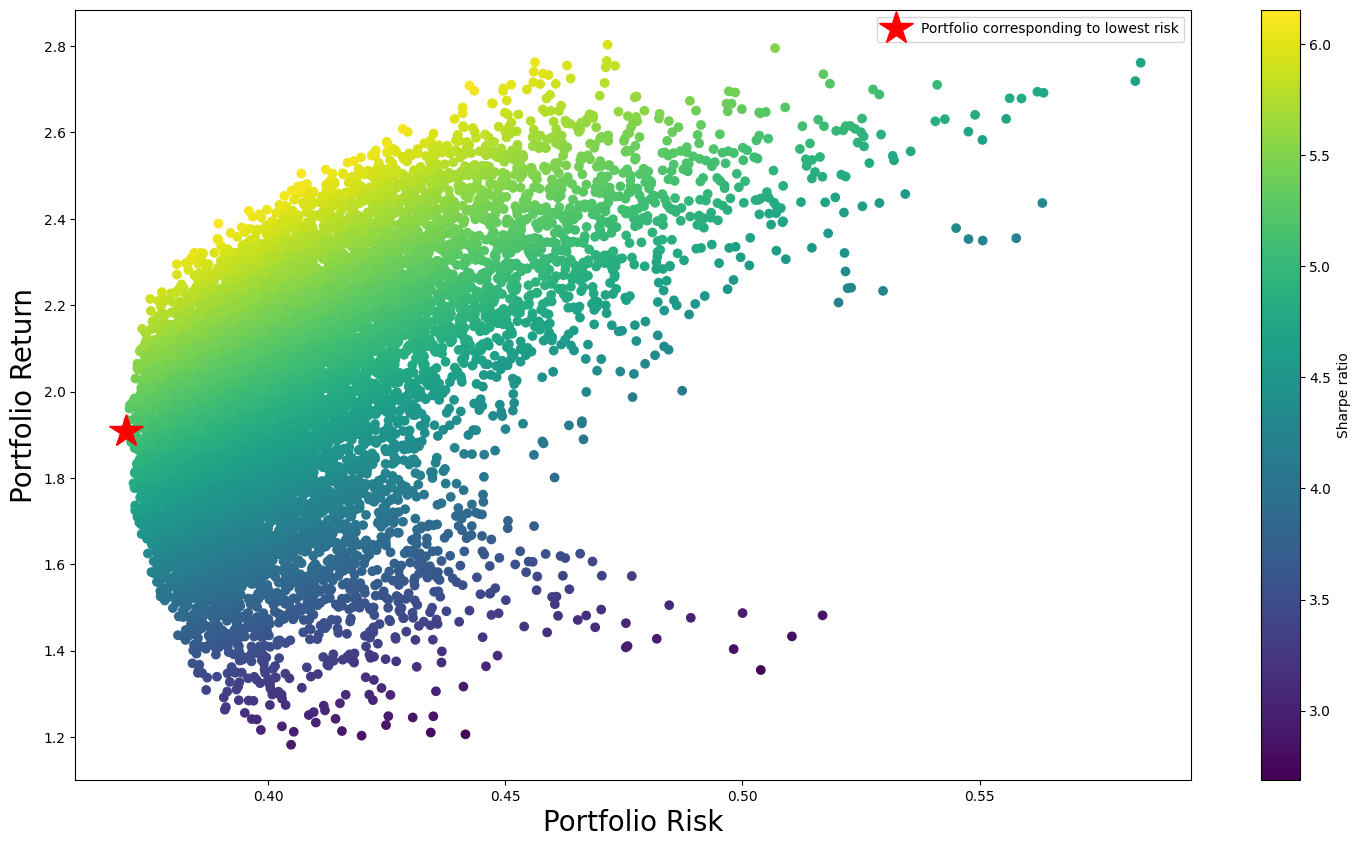

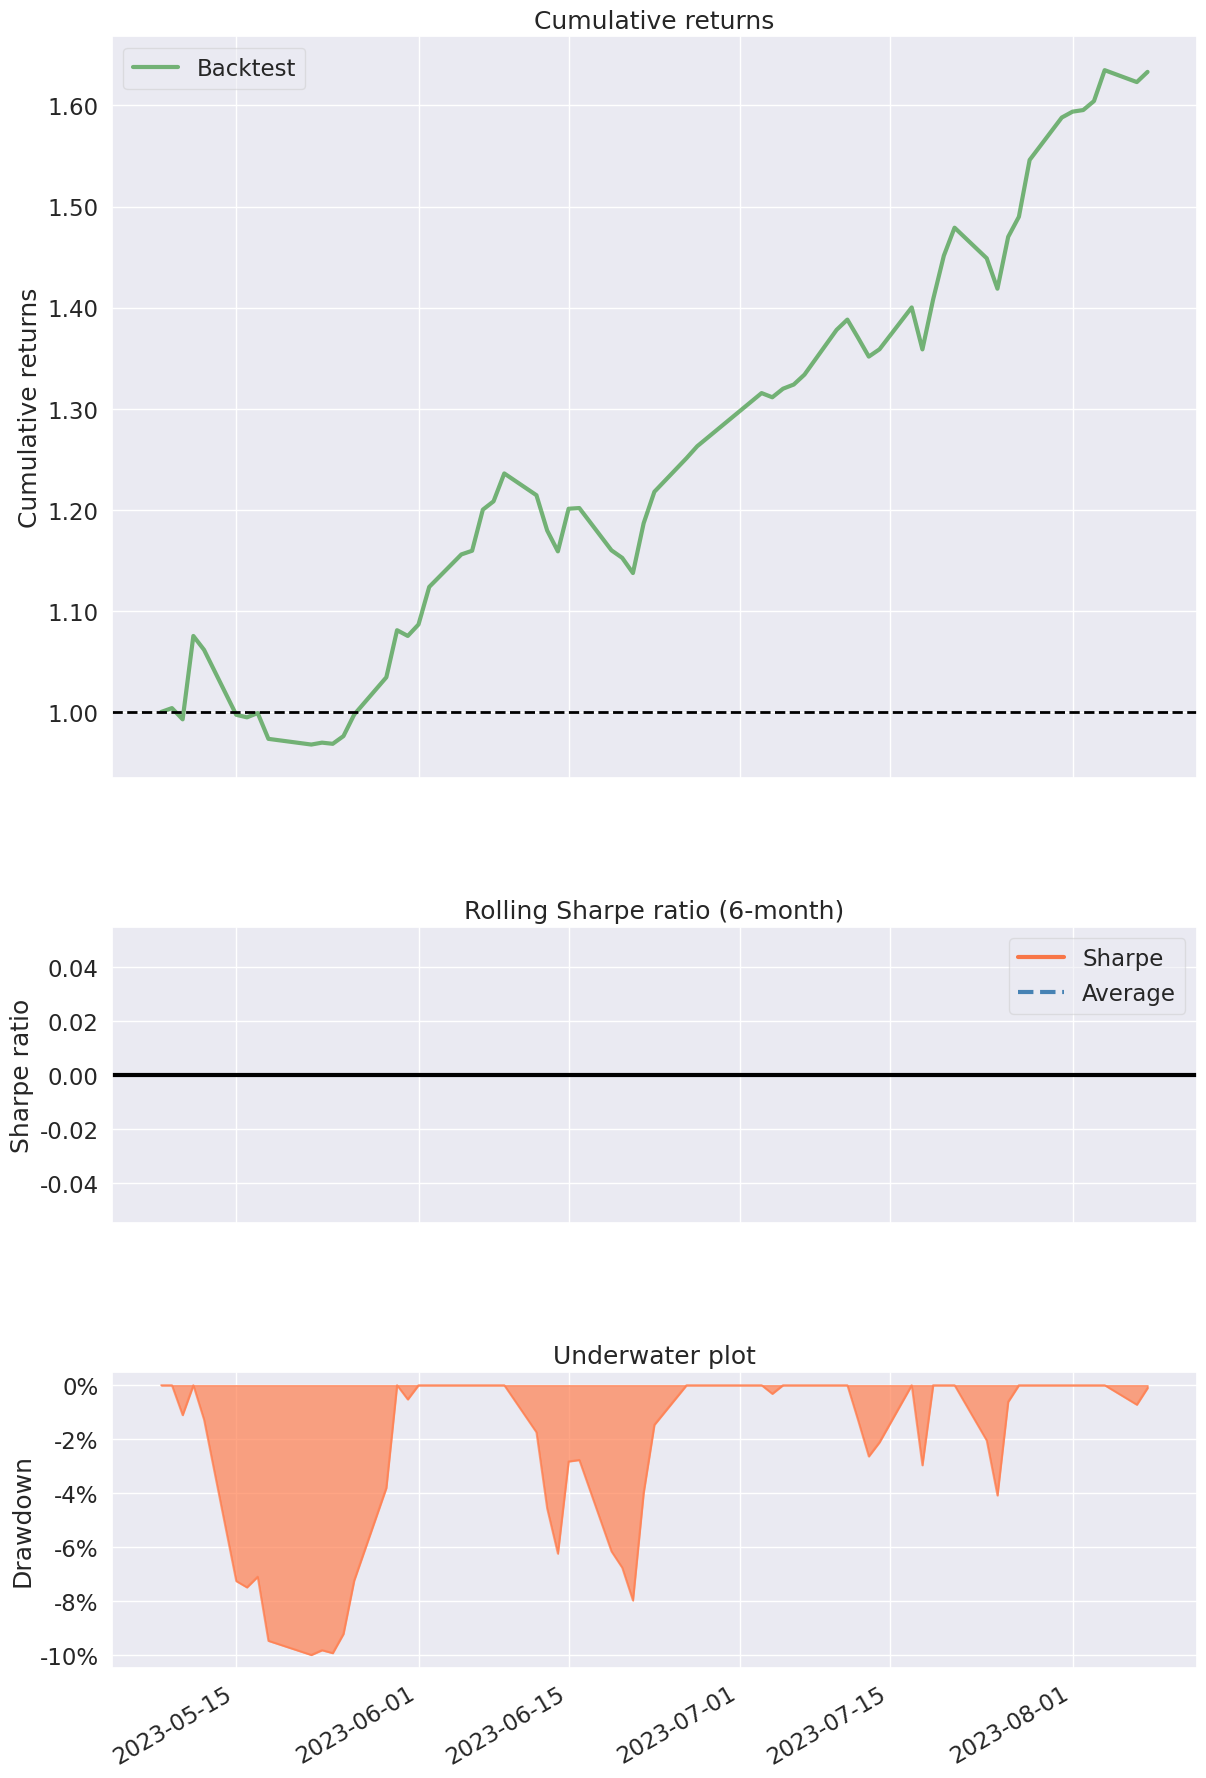

In [ ]:


# In[1]:


# Installing and Importing the libraries

!pip3 install pandas
!pip3 install numpy
!pip3 install matplotlib
!pip3 install seaborn
!pip3 install scipy
!pip3 install nsepy
!pip3 install pyfolio

from datetime import date
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import minimize
from nsepy import *

import os

from datetime import datetime
import time
import yfinance as yf


# ### BIST (stock market of Turkey) assets now selected <a name="asset_sel"></a>




BIST10 = [

    "ODAS.IS",  "ISCTR.IS", "ALARK.IS", "ENKAI.IS", "BIMAS.IS", "KOZAA.IS"

          ]



stock_list = BIST10


# ### Dates are selected for backtesting <a name="select_dates"></a>

# In[3]:


from datetime import date, timedelta

look_back = 93
current_date = date.today().isoformat()
days_before = (date.today() - timedelta(days=look_back)).isoformat()

#days_before = (date.today() - timedelta(days=90)).isoformat()
days_after =  date.today().isoformat()

print("\nCurrent Date: ",current_date)
print(f"{look_back} days before current date: ",days_before)
print("today : ",days_after)

dateStart = days_before
START_DATE = days_before
END_DATE   = days_after


# ### Download the adjusted close prices of stocks <a name="downloads"></a>

# In[4]:


LENGTH = 64

start_time = datetime.now()

price_list = []

print(LENGTH*"*")
print("Starting Download ...")
print(LENGTH*"*")
for tick in stock_list:
        print(f"Downloading {tick}")
        yf_tick = yf.Ticker(tick)
        df = yf_tick.history(interval='1d', auto_adjust=True, start=START_DATE, end=END_DATE, back_adjust = True, rounding=True)
        df.dropna(how='all', inplace=True)
        price_list.append(df)
print(LENGTH*"*")
print('Download complete...Time elapsed (hh:mm:ss.ms) {}'.format(datetime.now() - start_time))
print(LENGTH*"*")

## Save datafiles to disk

for i,df in enumerate(price_list):
        df.to_csv(f"{stock_list[i]}.csv")


# In[5]:


import pandas as pd
import os
Stocks = stock_list
pf_data = pd.DataFrame()
li = pd.DataFrame() # my real portfolio dataframe
rets = pd.DataFrame()
names = []
count = len(Stocks)

# os.chdir(wd)
#for file in sorted2.Stock:
for file in Stocks:
    pf_data = pd.read_csv(f"{file}.csv", index_col='Date', parse_dates=True, keep_date_col = True, infer_datetime_format=True, dayfirst=True, decimal="." )
    li = pd.concat( [li,pf_data['Close']],axis=1) #, ignore_index=True)

    st_name = file.split('.',maxsplit = 1)
    names.append(st_name[0])

li.columns = names

li = li.rename_axis(index="Date")

pf_data = li.sort_values(by=['Date'], ascending=[True])
pf_data.to_csv('BIST10.csv')
pf_data


# In[6]:


pf_data.corr()


# In[7]:


pf_data.info()


# ### Plotting daily prices of all the stocks
#

# In[8]:


plt.figure()
pf_data.plot(subplots = True,figsize = (10,10))
plt.title("Close prices of all stocks")
plt.show()


# ### Finding Daily returns
#
# Formulas used -> Ratio of present Day's return to Yesterday's return

# In[ ]:





#

# In[9]:


log_returns = np.log(pf_data/pf_data.shift(1))
log_returns


# In[10]:


log_returns.describe()


# ### Mean Log Returns

# In[11]:


np.round(log_returns.mean(),4)


# Let's calculate the annual average return

# In[12]:


yearly_rets = np.round(log_returns.mean() * 252,2) # Mean returns annualized for year
yearly_rets


# ### Standard deviations

# In[13]:


vol = np.round(log_returns.std()*np.sqrt(252),3) # annualized version of std deviation
vol


# In[14]:


risk_free_rate = 0.23


# In[15]:


sharpe = (yearly_rets - risk_free_rate)/vol
sharpe


# In[16]:


max_sr_vol = vol[sharpe.argmax()] # risk corresponding to maximum sharpe ratio
max_sr_ret = yearly_rets[sharpe.argmax()] # return corresponding to maximum sharpe ratio


# In[17]:


plt.figure(figsize=(8,8))
plt.scatter(vol, yearly_rets, c=sharpe, cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.title(f"R/R of selected {len(BIST10)} BIST assets and their portfolio")
plt.scatter(max_sr_vol, max_sr_ret,c='red', s=50) # red dot
plt.show()

print(f"Max Sharpe Ratio = {sharpe.max()}")
print(f"Max Sharpe Ratio Return = {max_sr_ret}")
print(f"Max Sharpe Ratio Volatility = {max_sr_vol}")


# In[18]:


log_returns.cov()


# ### Correlation and heatmaps of correlation

# In[19]:


log_returns.corr()


# ### Plotting Correlation HeatMap

# In[20]:


plt.figure(figsize=(8,8))
sns.heatmap(log_returns.corr(),linecolor='white',linewidths=1,annot=True)
plt.title("correlation heatmap of stocks")
plt.show()


# ### Using heatmap to find strongly positive or strongly negative correlated stocks

# In[ ]:





# In[ ]:





# - From the heatmaps, we can observe that there is no pair with negative correlation
# - We only have some pairs of stocks from banking sector with  high positive correlation

# In[21]:


sns.pairplot(log_returns,palette='coolwarm')
plt.show()


# - The pair plots also signify the same result that there is no pair of stocks with high negative correlation. We don't find any pair-plot with upper-left to lower-right pattern.
# - The pairs with high positive correlation have scatter plot with lower-left to upper-right pattern .
# - Other pairs don't form any pattern.

# # Markowitz Model
#
#
#
#
#

#
# - We model our assets by their expected return, $E[R]$ and their risk, which is expressed as their standard deviation, $\sigma$

# - Our investment decisions are expressed by investing 100% of our wealth in assets( here, stocks), where each particular investment represents a proportion of our total wealth.

#
# - We will now implement Markowitz Model. This model assists in the selection of the most efficient portfolios by analyzing various possible portfolios of the selected stocks.

# - We invest $w_i$ in $stock_i$ for every i, such that

#  <h3>$$\Sigma^{n}_{i=1} w_i = 1$$</h3>

# - The expected return of the portfolio constructed would be

# <h3>
# $$E[R_p] = \Sigma^{n}_{i=1} w_i E[R_i]$$</h3>

# and the risk associated with the portfolio would be
#

# <h3>$$\sigma^2(R_p) = \Sigma^{n}_{i=1} w_i^2 \sigma^2(R_i) + \Sigma^{}_{i=1}\Sigma^{}_{j {\neq} i} w_i w_j \sigma(R_i) \sigma(R_j) \rho_{ij}$$</h3>

# $E[R_i]$ is the annual expected return of $i$th stock, $\sigma(R_i)$ corrsponds to annual standard deviation of $i$th stock and $\rho_{ij}$ is the correlation between the logarithmic returns $i$th and the $j$th stock.

# - $E[R_p]$ is the annual expected return of the portfolio and $\sigma(R_p)$ is the risk associated with the portfolio (Also the standard deviation of the portfolio)

# - An efficient portfolio is one that maximizes return for a given level of risk. Our task is to select adequate weights $w_i$ to get the efficient portfolio

# #### Implementation

# -  Let $W_{1 \times n}$ be a array containing the weights $w_i$ such that $\Sigma^{n}_{i=1} w_i = 1$ and $E[R]_{ n\times 1}$ be another array containing annual expected returns of n stocks present in the portfolio and $C$ be the covariance matrix of annual returns of  stocks, then

# <h3>$$E[R_p] = WE[R]$$</h3>

#
# $$ \sigma^2(R_p) = W^TCW $$

# ### Sharpe Ratio
#
# - It is a statistical measure used in Modern Portfolio Theory.
# - The Sharpe ratio measures the performance of an investment compared to a risk-free asset, after adjusting for its risk. It is defined as the difference between the returns of the investment and the risk-free return, divided by the standard deviation of the investment.
# - A portfolio with a higher Sharpe ratio is considered to have best risk-adjusted returns.
#
#
#
#

# $$ S = \frac{E[R_p] - R_f}{\sigma(R_p)} $$

# Here, $R_f$ is the risk free rate of return. We have taken risk free rate as 10 year government bond rate in Turkey.

# In[22]:


# A function for generating a numpy array containing random weights that add upto 1
def RandWeights(size):
    weight = np.random.dirichlet(np.ones(size))
    return weight


# In[23]:



risk_free_rate = 0.235 # quite high in Turkey !

# A function to generate the avg return, risk and the sharpe ratio of the portfolio
# correponding to the weight array passed
def portfolio_stats(weight):

    # Convert to array in case list was passed instead.
    weight = np.array(weight)
    port_return = np.sum(log_returns.mean() * weight) * 250
    port_risk = np.sqrt(np.dot(weight.T, np.dot(log_returns.cov() * 250, weight)))
    sharpe = (port_return - risk_free_rate)/port_risk

    return {'return': port_return, 'risk': port_risk, 'sharpe': sharpe}


# In[24]:


# Trying to generate random weights

length = len(log_returns.columns)
weight = RandWeights(length)
weight


# In[25]:


# Generating Portfolio Statistics
pf_stats = portfolio_stats(weight)

pf_return = pf_stats['return']
pf_risk = pf_stats['risk']


# In[26]:


pf_return


# In[27]:


pf_risk


# In[28]:


sharpe_ratio = pf_stats['sharpe']


# In[29]:


sharpe_ratio


# #### We will now run a monte carlo simulation to generate random portfolios. We will use the results of simulation to draw an efficient frontier

# In[30]:


def Monte_Carlo(iterations):
    portfolio_returns = []
    portfolio_risks = []
    for x in range (iterations):
        weight = RandWeights(length)
        pf_stats = portfolio_stats(weight)
        portfolio_returns.append(pf_stats['return'])
        portfolio_risks.append(pf_stats['risk'])

    portfolio_returns = np.array(portfolio_returns)
    portfolio_risks = np.array(portfolio_risks)
    return portfolio_returns, portfolio_risks


# In[31]:


portfolio_returns, portfolio_risks = Monte_Carlo(10000)
sharpe = portfolio_returns / portfolio_risks
max_sr_ret = portfolio_returns[sharpe.argmax()] # return corresponding to maximum sharpe ratio
max_sr_vol = portfolio_risks[sharpe.argmax()] # risk corresponding to maximum sharpe ratio
max_sr_ret


# In[32]:


plt.figure(figsize=(18,10))
plt.scatter(portfolio_risks, portfolio_returns, c=sharpe, cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Risk')
plt.ylabel('Return')
plt.title('R/R Locus of portfolios: The Efficient Frontier')
plt.scatter(max_sr_vol, max_sr_ret,c='red', s=50) # red dot
plt.show()
print(f"Max Sharpe Ratio = {sharpe.max()}")
print(f"Max Sharpe Ratio Return = {max_sr_ret}")
print(f"Max Sharpe Ratio Volatility = {max_sr_vol}")


# - The above plot shows comparison of all portfolio combinations generated in Mone Carlo Simulation in terms of their risk and return. The red dot corresponds to the portfolio having the highest sharpe ratio amoung the generated portfolios. ( This portfolio may not be the one with highest sharpe ratio as we are plotting random portfolios. It is just the portfolio with highest sharpe ratio amoung all the randomly generated portfolios)

# - We will now try to generate optimized portffolios subject to various conditions

# - This hyperbolic plot is called 'Markowitz's Bullet'

# #### Using Optimization to find portfolio with max sharpe ratio
# - The below function returns the weights array cooresponding to the portfolio with the highest Sharpe Ratio
# - We are using Scipy.optimize.minimize. We are trying to minimize negative Sharpe Ratio (which is same as maximising the sharpe ratio)
# - The constraint for optimization is -> Sum of all the weights has to be 1, and all the weights are bounded between 0 and 1

# - The optimization is successful.
#

# - The required weights are in the key x

# #### Using Optimisation to find portfolio that has minimum risk for a given expected return
#
# - Sometimes, the investors want to have a portfolio with a fixed targert return.
# - They want to find portfolio that would provide that return with minimum risk involved

#

# #### Finding portfolio that provide the minimum risk

# In[33]:


def OptimizationWithSharpeRatio():

    def FindNegSharpe(weight):
        return (-1)*portfolio_stats(weight)['sharpe']

    res = minimize(
          FindNegSharpe,
          RandWeights(length),
          method = 'SLSQP',
          constraints=[
            {'type': 'eq', 'fun': lambda w: np.sum(w) - 1.},
          ],
          bounds=[(0, 1) for i in range(length)]
        )

    return res

def OptimizingWithMinRisk():

    def fun(weight):
        pf_stats = portfolio_stats(weight)
        _risk = pf_stats['risk']
        return _risk


    res = minimize(
      fun,
      RandWeights(length),
      method = 'SLSQP',
      constraints=[
        {'type': 'eq', 'fun': lambda w: np.sum(w) - 1.},
      ],
      bounds=[(0., 1.) for i in range(length)]
    )

    return res


# In[34]:


OptimizingWithMinRisk()


# ### Plotting the efficient Frontier

# - The efficient frontier is the set of optimal portfolios that offer the highest expected return for a defined level of risk or the lowest risk for a given level of expected return. Portfolios that lie below the efficient frontier are sub-optimal because they do not provide enough return for the level of risk.
#
#
#
#

# - We will plot the efficient frontier by taking the optimal portfolios for all possible returns

# In[35]:


target_returns = np.linspace(portfolio_returns.min(), portfolio_returns.max(),20)

minimal_risks = []
for target_return in target_returns:
    optimal = OptimizingWithMinRisk()
    minimal_risks.append(optimal['fun'])

minimal_risks = np.array(minimal_risks)
print(minimal_risks)


# In[36]:


plt.figure(figsize=(18,10))

plt.scatter(portfolio_risks, portfolio_returns,
            c = ( portfolio_returns / portfolio_risks),
            marker = 'o')

# Plotting the efficient frontier
# plt.scatter(minimal_risks,
#             target_returns,
#             c = (target_returns / minimal_risks),
#             marker = 'x')


#Plotting the optimal portfolio that has lowest risk
Optimal_weights_For_Lowest_Risk = OptimizingWithMinRisk().x
#Optimal_weights_For_Lowest_Risk = OptimizationWithSharpeRatio().x


plt.plot(portfolio_stats(Optimal_weights_For_Lowest_Risk)['risk'],
         portfolio_stats(Optimal_weights_For_Lowest_Risk)['return'],
         'r*',
         markersize = 25.0, label = "Portfolio corresponding to lowest risk")


plt.xlabel('Portfolio Risk',fontsize = 20)
plt.ylabel('Portfolio Return', fontsize = 20)
plt.legend(prop={'size': 10})
plt.colorbar(label='Sharpe ratio')


# - The efficient frontier is different for different investors, depending upon the assets they are holding
#
#

# - There is nothing like a single optimal portfolio. The efficient frontier is the collection of optimal portfolios.

# - The investors can choose any optimal portfolio depending upon the risk they can take

# In[37]:


w = np.round(Optimal_weights_For_Lowest_Risk,4)
w
len(w)


# In[38]:


BEST_PF = pd.Series(w*100, log_returns.columns)
print("% weights of minimum volatility PF")
print (60*"-")

index = w>=0.000
BEST_PF[index].round(3)


# In[39]:


w = np.round(Optimal_weights_For_Lowest_Risk,4)
BEST_PF = pd.Series(w*100, stock_list)
print("% weights of minimum volatility PF")
index = w>=0.000
Final_TEFAS_PF = pd.DataFrame(BEST_PF[index].round(3),  columns=['%'] )
Portfolio_Weights = w[index].round(3)
Portfolio_Assets = BEST_PF[index]
Portfolio_Amounts = Portfolio_Weights*100000
Final_TEFAS_PF['Amounts for Capital of 100000 TL'] = Portfolio_Amounts
print(portfolio_stats(Optimal_weights_For_Lowest_Risk))
Final_TEFAS_PF.sort_values(by=['%'], ascending=[False])


# In[40]:


import datetime

import pandas as pd
import pandas_datareader.data as web
import seaborn as sns
from IPython.display import VimeoVideo


# In[41]:


def getReturns(startTime, endTime, tickers):
    # pull price data from yahoo -- (list(tickers.keys())) = ['^GSPC','^RUT']
    prices = web.DataReader(BIST10, "yahoo", START_DATE, END_DATE)["Adj Close"]
    prices = prices.dropna()
    returns = prices.pct_change()
    return prices.pct_change()


# In[42]:


def compareVariance(startTime, endTime, tickers, weights):
    returns = getReturns(startTime, endTime, tickers)
    tmp = weights * returns
    returns[f"Portfolio w/ weights {Portfolio_Weights}"] = tmp[tmp.columns[0]] + tmp[tmp.columns[1]]
    standardDev = returns.std()
    avgReturns = returns.mean()
    res = pd.concat([avgReturns * 100, standardDev*100], axis=1)
    res.columns = ["Daily Average Return %", "Standard Deviation of Returns %"]
    return res.round(3)


# In[43]:


#compareVariance( START_DATE, END_DATE, BIST10, Portfolio_Weights )


# In[44]:


import pyfolio
#pyfolio.create_simple_tear_sheet(log_returns.CANTE.dropna())


# In[45]:


log_returns


# In[46]:


Final_TEFAS_PF


# In[50]:


#log_returns["Portfolio"] = (log_returns.CANTE * Portfolio_Weights[0]) + (log_returns.QUAGR * Portfolio_Weights[1])

#log_returns["Portfolio"] = (log_returns[1] * Portfolio_Weights[0]) + (log_returns.QUAGR * Portfolio_Weights[1])

Portfolio_Amounts = np.multiply(100000, Portfolio_Weights )
InitialPrices = pf_data.iloc[0,0:]

Portfolio_Shares = np.trunc((Portfolio_Amounts / InitialPrices)) # determine shares
#OrderedTable['PF_Value'] = np.dot(Portfolio_Shares, Prices.T)

np.shape(Portfolio_Shares)

Prices = pf_data.iloc[:,0:]
Prices


# In[56]:


pf_data['Portfolio'] = np.dot(Portfolio_Shares, Prices.T)  # PF_VALUE = dot product of shares and their prices !!!!
pf_data['PF_Rets'] = pf_data['Portfolio'].pct_change()


# In[58]:


pyfolio.create_simple_tear_sheet(pf_data['PF_Rets'])

print(Portfolio_Weights)
# Maximum drawdown and VaR values of the Portfolio has decreased significantl by selection of minimum risk weights.

# In[ ]:





# In[ ]:





# In[ ]:






In [ ]:
print(Portfolio_Weights)

[0.108 0.266 0.203 0.133 0.182 0.108]


In [ ]:
np.round(79517*Portfolio_Weights)

array([ 8588., 21152., 16142., 10576., 14472.,  8588.])

In [ ]:
InitialPrices = pf_data.iloc[0,0:]

In [ ]:
InitialPrices


ODAS             5.44
ISCTR           11.71
ALARK           54.90
ENKAI           25.78
BIMAS          160.24
KOZAA           32.30
Portfolio    99821.93
PF_Rets           NaN
Name: 2023-05-08 00:00:00+03:00, dtype: float64

In [ ]:
pf_data.iloc[-1,0:]

ODAS             11.160000
ISCTR            16.230000
ALARK           110.900000
ENKAI            32.940000
BIMAS           231.200000
KOZAA            59.900000
Portfolio    163029.330000
PF_Rets           0.006227
Name: 2023-08-08 00:00:00+03:00, dtype: float64